In [25]:
from utilities import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

In [65]:
from tqdm import tqdm

def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    parametres = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return parametres

# MODEL
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    # Calculer les vecteurs Z1 et Z2
    Z1 = W1.dot(X) + b1 # Z = X.W + b
    A1 = 1 / (1 + np.exp(-Z1)) # A = 1/(1+e^-z) (Fonction Sigmoide)
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2)) # Activation a la fin du reseaux
    activations = {
        "A1": A1,
        "A2": A2
    }
    return activations

# FUNCTION COUT
def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1-y) * np.log(1-A + epsilon))

# DESCENTE DE GRADIENT
def back_propagation(X, y, activations, parametres):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    # derivee de L % a W
    m = y.shape[1]
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1-A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        "dW2": dW2,
        "db2": db2,
        "dW1": dW1,
        "db1": db1
    }
    return gradients

# MIS A JOUR
## learning_rate = pas de mis a jour
def update(gradients, parametres, learning_rate):
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parametres = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return parametres

# PREDICTION
def predict(X, parametres):
    # Activation
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    #print(A) # LA PROBABILITE D'APPERTENIR A CLASSE 1
    return A2 >= 0.5

# RASSEMBLEMENT
def neural_network(X_train, y_train, n1, learning_rate=0.1, n_iter=100):
    # initialisation
    n0 = X_train.shape[0]
    # nombre de neurones qu'on veut avoir
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    train_loss = [] # pour verifier l'apprentissage
    train_acc = []
    # boucle d'apprentissage
    for i in tqdm(range(n_iter)):
        # COUT
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        if i%10 == 0:
            # TRAIN
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
    
    #x0 = np.linspace(-1, 4, 100)
    #x1 = (-W[0] * x0 - b) / W[1]
    #x0 = x0.reshape((1, x0.shape[0]))
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label="TRAIN LOSS") # L'evolution des erreurs effectuees par le model
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label="TRAIN ACC") # L'evolution de l'entrainement
    plt.legend()
    plt.subplot(1, 3, 3)
    plt.scatter(X_train[0, :], X_train[1, :], c=y, cmap="summer")
    #plt.plot(x0, x1, c='orange', lw=3)
    plt.show()
    
    return parametres # Parametre que le model a apris

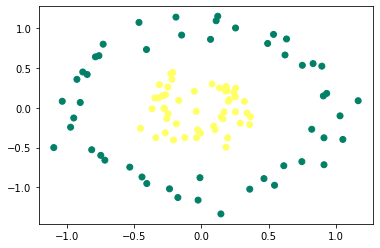

In [43]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
y = y.reshape((y.shape[0], 1))
X = X.T
y = y.reshape((1, y.shape[0]))
plt.scatter(X[0, :], X[1, :], c=y, cmap="summer")
plt.show()

In [34]:
X.shape, y.shape

((2, 100), (1, 100))

100%|██████████| 1000/1000 [00:00<00:00, 3446.83it/s]


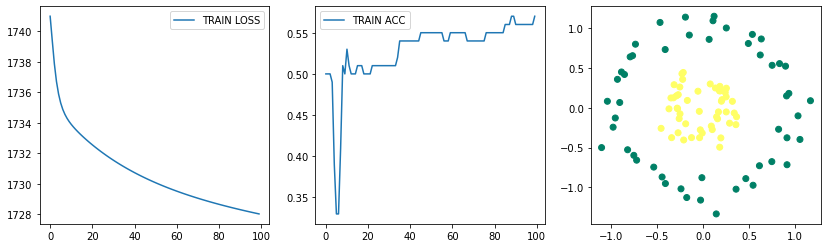

In [66]:
parametres = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)

100%|██████████| 1000/1000 [00:00<00:00, 3024.85it/s]


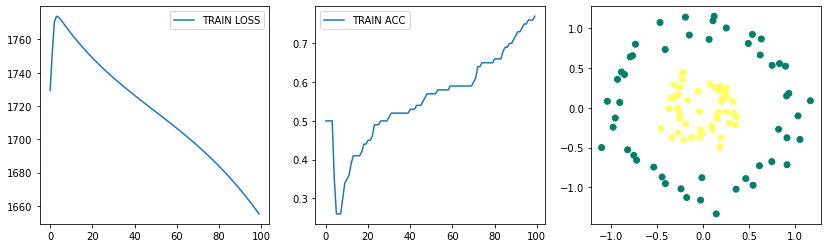

In [67]:
parametres = neural_network(X, y, n1=8, n_iter=1000, learning_rate=0.1)

100%|██████████| 1000/1000 [00:00<00:00, 2537.87it/s]


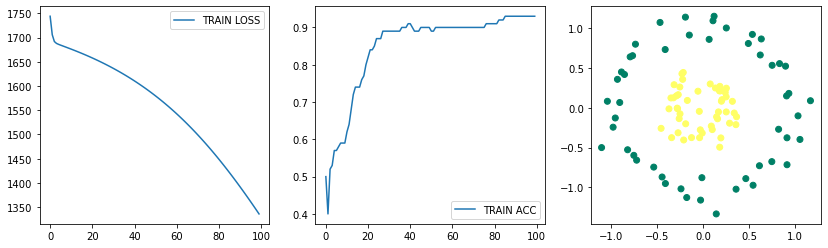

In [68]:
parametres = neural_network(X, y, n1=16, n_iter=1000, learning_rate=0.1)

100%|██████████| 1000/1000 [00:00<00:00, 1013.37it/s]


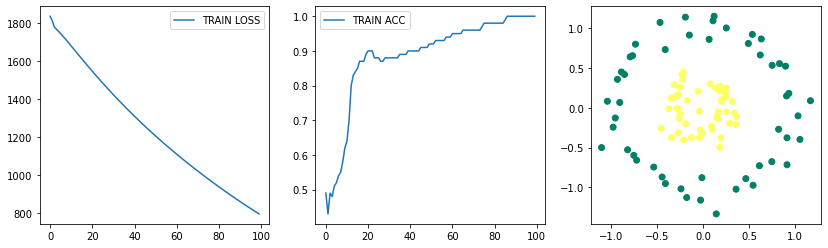

In [69]:
parametres = neural_network(X, y, n1=32, n_iter=1000, learning_rate=0.1)